Complete the following exercises:

    Page 89: 7-1 (Using data from the NSFG, make a scatter plot of birth weight versus mother’s age…)
    Page 99: 8-1 (In this chapter we used sample mean to estimate • and found that the sample mean yields lower MSE…)
    Page 99: 8-2 (Suppose that you draw a sample size with n = 10 from an exponential distribution with • = 2…)


# Stoneburner, Kurt
- ## DSC 530 - Week 07

In [1]:
# //****************************************************************************************
# //*** Set Working Directory to thinkstats folder.
# //*** This pseudo-relative path call should work on all Stoneburner localized projects. 
# //****************************************************************************************

import os
import sys
workingPath = os.getcwd().replace("coding", "ThinkStats2\\code")
sys.path.insert(1, workingPath)
os.chdir(workingPath)

In [2]:
# //*** Imports and Load Data
import nsfg
import thinkstats2
import thinkplot
import first
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

#resp = nsfg.ReadFemResp()
#preg = nsfg.ReadFemPreg()


- ## Chapter 7, Exercise 1

In [3]:
# //*** Get a pandas dataframe from the first library
live, firsts, others = first.MakeFrames()
# //*** Drop N/A values from agepreg and totalwgt_lb columns
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

**Using data from the NSFG, make a scatter plot of birth weight versus mother’s age.**

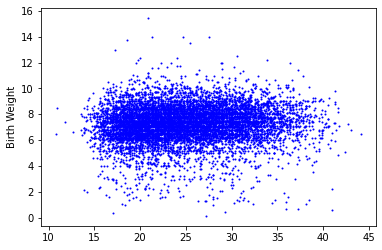

In [4]:
# //*** scatter plot with matplotlib
plt.scatter(live['agepreg'], live['totalwgt_lb'], 1, color='b')
#plt.title(f"Biased Distribution\nMean: {round(resp['numkdhh'][resp['numkdhh'] > 0].mean(),2)}")
#plt.xlabel('Top 30 Jobecodes by Frequency')
plt.ylabel('Birth Weight')
plt.show()


**Plot percentiles of birth weight versus mother’s age.**

In [5]:
# //********************************************
# //*** Reusable Functions Return from Week 03!
# //********************************************
# //*** Returns Series as a PMF
# //********************************************
def build_pmf(input_series):
    output_series = input_series.copy()
    total_values = input_series.sum()
    for value,freq in output_series.items():
        #print(f"{value} {freq} {total_values} {freq/total_values}")
        output_series.loc[value] = freq/total_values
    return output_series

# //*** Build a Cumulative Distribution Function from a Probability Mass Function
# //*** Returns a Series
def build_cdf(input_series):
    # //*** If input is not panda or pd series, try to convert it
    if not isinstance(input_series,pd.core.series.Series):
        input_series = pd.Series(input_series)
        
    # //*** If input is np.Array
    output_series = input_series.copy()
    cumulative_value = 0
    for value,freq in output_series.items():
        #print(f"{value} {freq} {cumulative_value} {freq + cumulative_value}")
        cumulative_value = freq + cumulative_value
        output_series.loc[value] = cumulative_value
    return output_series

# //*** Retrieve a percentile value from a CDF.
# //*** Returns index value closest to input parameter percentile.
def get_cdf_percentile(input_cdf,percentile):
    #print(f"{input_cdf}")
    #//*** Initialize output to first value
    output = input_cdf.index[0]
    
    #//*** Loop through all items till the value exceeds the percentile
    #//*** Return value from last loop
    for index,value in input_cdf.items():
        
        if value > percentile:
            return output
        else:
            output = index
            

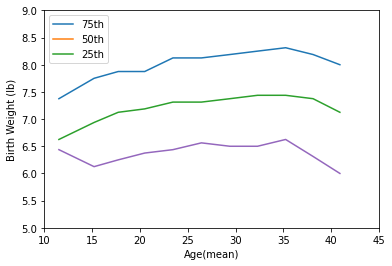

In [6]:
# //*** Build some abstraction to ease future use
# //*** The dependent Variable will be expressed as a mean of each binned value
dependent_variable = 'agepreg'
# //*** The independent variable will generate CDF percentiles for each binned_value
independent_variable = 'totalwgt_lb'

# //*** Get min and Max ages to set the limits of the group by bins
# //*** Converting to integers adds headroom (extra space) to the floor
# //*** Max + 1 gives a little extra room for Max
minVal = int(live[dependent_variable].min())
maxVal = int(live[dependent_variable].max())+1
bin_values = [.75,.50,.25]

# //*** Build binning parameters. Minimum value, Maximum Value, # of Bins
bins = np.arange(minVal, maxVal, len(bin_values))

#//*** Builds Index values for the bins
#//*** Seems very obtuse to me
indices = np.digitize(live[dependent_variable], bins)

#//*** Groups the dataframe into groups of binned indexes
groups = live.groupby(indices)   

# //*** Builds a list of the age mean for each binned values
mean_age_preg = [group.agepreg.mean() for i, group in groups]

# //*** Build a list CDFs for each binned value
CDFs = []

# //*** group is a tuple. Tuple[0] = index, tuple[1] = dataframe
for group in groups:
    #//*** CDF for each binned dataframe
    weight_counts = group[1][independent_variable].value_counts().sort_index()
    weight_counts_pmf = build_pmf(weight_counts)   
    weight_counts_cdf = build_cdf(weight_counts_pmf)   
    CDFs.append(weight_counts_cdf)

# //***********************************************************************************************************
# //*** Trim the last data point. The final values are converging for some reason. The book appears to trim
# //*** The last values off the groups using groups [1:-1]. That code does not run. Guessing it's due to a 
# //*** Syntax shift
# //***********************************************************************************************************
del CDFs[-1]
del mean_age_preg[-1]

labels = []
for x in bin_values:
    # //*** Build a list of percentiles to plot from each cdf using the percentile stored in bin_values
    weight_percentiles = [get_cdf_percentile(cdf,x) for cdf in CDFs]
    loop_label= f"{int(x*100)}th"
    plt.plot(mean_age_preg,weight_percentiles,1, label=loop_label)
    labels.append(loop_label)

plt.xlabel('Age(mean)')
plt.ylabel('Birth Weight (lb)')

plt.legend(labels)
plt.xlim(minVal,maxVal)
plt.ylim(5,9)
plt.show()
    
    


Note: My 25th Percentile values don't match the book solutions and I don't understand why. My binned values for the first bin seem high. I believe I matched the sample code in setting this up, so i'm perplexed and moving on.

**Compute Pearson’s and Spearman’s correlations.**

Pregnancy Age and Birth Weight Pearson's Correlation: 0.0688

This result is significant with p < .05: 5.72e-11

Pregnancy Age and Birth Weight Spearman's rank order correlation: 0.0946

This result is significant with p < .05: 2e-19


In [7]:
pearson_cor = scipy.stats.pearsonr(live['agepreg'],live['totalwgt_lb'])
spearman_rank = scipy.stats.spearmanr(live['agepreg'],live['totalwgt_lb'])

print(f"Pregnancy Age and Birth Weight Pearson's Correlation: {round(pearson_cor[0],4)}")
print(f"This result is significant with p < .05: {round(pearson_cor[1],13)}")
print(f"Pregnancy Age and Birth Weight Spearman's rank order correlation: {round(spearman_rank[0],4)}")
print(f"This result is significant with p < .05: {round(spearman_rank[1],21)}")

Pregnancy Age and Birth Weight Pearson's Correlation: 0.0688
This result is significant with p < .05: 5.72e-11
Pregnancy Age and Birth Weight Spearman's rank order correlation: 0.0946
This result is significant with p < .05: 2e-19


**How would you characterize the relationship between these variables:**

The scatterplot shows a loose relationship between age and birth weight. There is no significant correlation between a mother's age and newborn birth weight.

- ## Chapter 8, Exercise 1

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

### **Response:** ###

**Both the sampled $\bar{x}$ and sampled median produce unbiased estimators. As m (distribution iterations or sample_count) increase the Standard Error $\sqrt{MSE}$ decreases.**

**Tests using a sample_count of 100,500,1000 & 5000, resulted in a lower standard error as the sample_count increased.**


m=100  - Mean Standard Error: 0.09629686273430654    : Median Standard Error: 0.11655846537662139

m=500  - Mean Standard Error: 0.0018087969806330204  : Median Standard Error: 0.0027147858150198905

m=1000 - Mean Standard Error: 0.0009411342595569493  : Median Standard Error: 0.00146110598466215

m=5000 - Mean Standard Error: 0.00020222323693274804 : Median Standard Error:0.000317970028439837


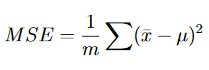

$$\text {$\bar{x}$ = Sample Mean} $$

$$\text {µ = distribution mean} $$

$$\text {m = number of tests to run} $$

In [19]:
# //*** Build a mean estimator

import random
# //***********************************************
# //*** Build a list comprised of a list of samples from a normal distribution.
# //*** n=sample size: Default = 7
# //*** m=totak number of samples
# //*** mean = Distribution mean
# //*** std_dev = Distribution standard deviation
# //***********************************************
# //*** Returns:
# //****    list of list samples.
# //****    list of means for each sample
# //****    list of medians for each sample
# //******************************************
def random_distribution_normal(n=7, m=1000,mean=0,std_dev=1):
    mu = mean
    sigma = std_dev

    means = []
    medians = []
    biased_variance = []
    unbiased_variance = []
    
    # //***
    for _ in range(m):
        #//*** Generate List of Samples
        xs = [random.gauss(mu, sigma) for _ in range(m)]
        #//*** Mean of Sample
        xbar = np.mean(xs)
        #//*** Median of Sample
        median = np.median(xs)

        
        means.append(xbar)
        medians.append(median)
        biased_variance.append( np.var(xs) )
        unbiased_variance.append( np.var(xs, ddof=1) )

    return xs,means,medians,biased_variance,unbiased_variance

# //**************************************************************************************************************
# //*** This is the most pythonic thing i've written. It's a lot for a single line.
# //*** Starts with a loop iterator of the variance lists. 
# //*** Subtracts the actual variance from the biased variance for each instance, outputs each value into a list
# //*** Gets the mean of all values in the list
# //**************************************************************************************************************
def mean_error(input_samples,actual_variance):
    return np.mean([ bias - actual_variance for bias in input_samples ])

for x in [100,500,1000,5000]:
    # //****************************
    sample_size = 7
    sample_count = x
    distribution_mean = 0
    distribution_std_dev = 1
    # //****************************

    # //*** Generate list of sample lists, with sample mean and median
    samples,samples_means,samples_medians,samples_biased_var,samples_unbiased_var = random_distribution_normal(
        sample_size,sample_count,distribution_mean,distribution_std_dev)
    # //********************
    # //*** Determine MSE
    # //***************************************************************************
    # //*** Find the difference between:
    # //***            the Sample Mean and the distribution_mean
    # //***            and the sample median and the distribution_mean
    # //*** Square the difference
    # //*** Sum the result with the running total
    # //*** when done with loop Multiply the result by 1/sample_count (or 1/m)
    # //***************************************************************************    
    print(f"##########################################################################")
    difference_sum_mean = 0
    difference_sum_median = 0
    for index in range(sample_count):
        loop_mean = samples_means[index]
        loop_median = samples_medians[index]
        #print(f"{index} {samples_means[index]} {samples_medians[index]} {loop_mean - loop_median} {(loop_mean - loop_median)**2} {difference_sum}")
        difference_sum_mean = (loop_mean - distribution_mean)**2 +  difference_sum_mean 
        difference_sum_median = (loop_median - distribution_mean)**2 +  difference_sum_median 

    # //*** difference_sum = sum of mean - median squared for each sample
    # //*** MSE = (1/sample_count) * difference Sum
    estimator_mean_MSE = (1/sample_count) * difference_sum_mean
    estimator_median_MSE = (1/sample_count) * difference_sum_median
    
    print(f"Sample Count (m): {x}")
    print(f"########################")
    print(f"Estimator Mean Squared Error (MSE): {estimator_mean_MSE}")
    print(f"Estimator Median MSE:               {estimator_median_MSE}")
    print(f"Estimator Mean sqrt(MSE):           {np.sqrt(estimator_mean_MSE)}")
    print(f"Estimator Median sqrt(MSE:          {np.sqrt(estimator_median_MSE)}")

    # //*** Find the Mean error between the unbiased and biased variance
    # //*** An individual error is the estimated variance - actual variance (standard deviation ** 2)
    # //*** Find the mean of all bias and unbiased sample variances

    actual_variance = distribution_std_dev ** 2
    
    biased_variance = mean_error(samples_biased_var,actual_variance)
    
    unbiased_variance = mean_error(samples_unbiased_var,actual_variance)


    print(f"Formula Variance:                   {np.mean([ bias - actual_variance for bias in samples_biased_var ])}")
    print(f"Formula Variance:                   {np.mean([ bias - actual_variance for bias in samples_unbiased_var ])}")
    print(f"##########################################################################")


##########################################################################
Sample Count (m): 100
########################
Estimator Mean Squared Error (MSE): 0.0113762722014126
Estimator Median MSE:               0.014978719588887563
Estimator Mean sqrt(MSE):           0.10665960904397034
Estimator Median sqrt(MSE:          0.12238757938977127
Formula Variance:                   -0.012843856393472599
Formula Variance:                   -0.0028725822156288995
##########################################################################
##########################################################################
Sample Count (m): 500
########################
Estimator Mean Squared Error (MSE): 0.002267596018055325
Estimator Median MSE:               0.0034651531088186077
Estimator Mean sqrt(MSE):           0.04761928199852791
Estimator Median sqrt(MSE:          0.05886555112133588
Formula Variance:                   -0.005608481650546795
Formula Variance:                   -0.0036157130767001

- ## Chapter 8, Exercise 2

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



The mean of an exponential distribution L could be 1 / scale. We could substitute the $\bar{x}$ for scale and get L as an estimator.

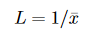 



Median estimation is using: Lm = log(2) / median
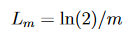


In [14]:
import math 

# //*** Build a list comprised of a list of samples from a normal distribution.
# //*** n=sample size: Default = 7
# //*** m=totak number of samples
# //*** low_val = Distribution minimum value
# //*** high_val = Distribution maximum value
# //******************************************
# //*** Returns:
# //****    list of list samples.
# //****    list of means for each sample
# //****    list of medians for each sample
# //******************************************
def random_distribution_exponential(distribution_size=7, distribution_count=1000,scale=2):

    xs=[]
    means = []
    medians = []
    
    # //***
    for _ in range(distribution_count):
        #//*** Generate List of Samples
        xs.append(np.random.exponential( 1 / scale, distribution_size))
        
        #//*** Mean estimation
        L = 1/np.mean(xs)
        #//*** Median estimation
        Lm = math.log(2) / np.median(xs)
        
        means.append(L)
        medians.append(Lm)

    return xs,means,medians


# //****************************
sample_size = 10
sample_count = 1000
sample_scale = 2
# //***************************             
samples_exp, samples_mean_exp,samples_median_exp = random_distribution_exponential(sample_size,sample_count,sample_scale)


[2.7257572531920355, 2.795310321894048, 2.404615703564505, 2.4710511035659666, 2.1518345485671224, 2.1658386862132812, 2.176499005172634, 2.206170020992392, 2.1132539503963925, 2.1148196170277815, 2.0837138976496608, 2.081770110369886, 2.1277314519375197, 2.167365330044843, 2.178871394684168, 2.233747699565274, 2.2400242437114684, 2.2291263077271024, 2.2075484792993616, 2.2128995295300142, 2.2311094576747816, 2.1942816791488795, 2.2248786319286027, 2.2386545657441417, 2.2447830822474875, 2.291329665914354, 2.3111966086761346, 2.303198778863927, 2.2568996762339713, 2.2648230749046547, 2.2885713963329213, 2.3252948603236154, 2.2899719870474056, 2.2651978877685086, 2.2549780700538453, 2.2539607656231526, 2.2399388426997784, 2.2359475192373868, 2.250882632988881, 2.2145034763896225, 2.1906922597873333, 2.177284470568093, 2.193970629657159, 2.2070478253590875, 2.2133801346940674, 2.2043911796927462, 2.159207148033434, 2.1404464186765866, 2.1412925175017357, 2.131886347616246, 2.102624813970

In [ ]:
# //*** CODE HERE

In [ ]:
# //*** Matplot reference
#plt.scatter(live['totalwgt_lb'], live['agepreg'],1, color='b')
#plt.tight_layout()

#plt.xticks(billable_value_count_top_30.index.values, billable_value_count_top_30.index, rotation='vertical')
#plt.title(f"Biased Distribution\nMean: {round(resp['numkdhh'][resp['numkdhh'] > 0].mean(),2)}")
#plt.xlabel('Top 30 Jobecodes by Frequency')
#plt.ylabel('Item Frequency')
#plt.figure(figsize=(1,500))
plt.show()
